# BIG DATA MART SALES PREDICTION

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load datasets
train=pd.read_csv("bigdatamart_train.csv")
test=pd.read_csv("bigdatamart_test.csv")

In [3]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [5]:
print('Train_data:',train.shape)
print('Test_data:',test.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [6]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
test.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
#combining train and test datasets into single dataframe
train['source']='train'
test['source']='test'
df=pd.concat([train,test],ignore_index=True)

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [13]:
df.shape

(14204, 13)

# EDA:

# Visualization:

Distribution Plot:

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

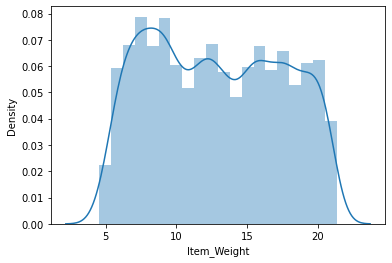

In [14]:
sns.distplot(train["Item_Weight"])

We can see that the Item_weight column is not normally distributed. Most of the weight are between 5 and 20.

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

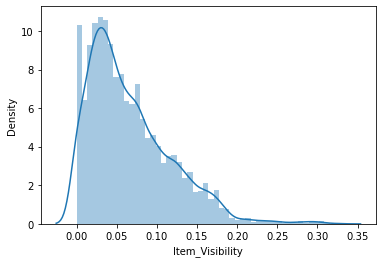

In [15]:
sns.distplot(train["Item_Visibility"])

we can see that Item_Visibility column is not normally distributed. Most of the items are not visible.

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

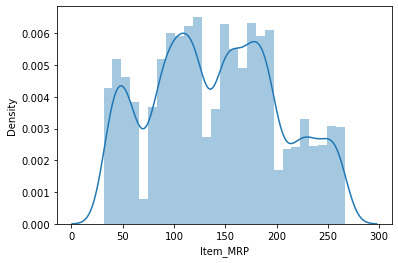

In [16]:
sns.distplot(train["Item_MRP"])

In [17]:
We can see that Item_MRP column is not normally distributed. 

SyntaxError: invalid syntax (<ipython-input-17-f71b808e825e>, line 1)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

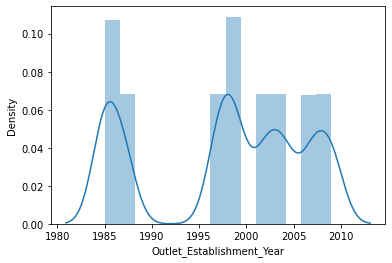

In [18]:
sns.distplot(train["Outlet_Establishment_Year"])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

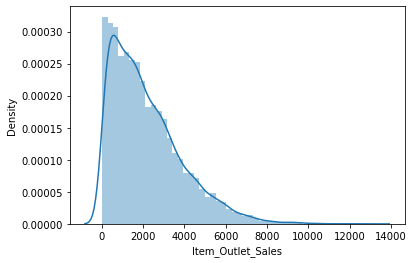

In [19]:
sns.distplot(train["Item_Outlet_Sales"])

We can see that the Item_Outlet_Sales is not normally distributed.

Count Plot:

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Dairy'),
  Text(1, 0, 'Soft Drinks'),
  Text(2, 0, 'Meat'),
  Text(3, 0, 'Fruits and Vegetables'),
  Text(4, 0, 'Household'),
  Text(5, 0, 'Baking Goods'),
  Text(6, 0, 'Snack Foods'),
  Text(7, 0, 'Frozen Foods'),
  Text(8, 0, 'Breakfast'),
  Text(9, 0, 'Health and Hygiene'),
  Text(10, 0, 'Hard Drinks'),
  Text(11, 0, 'Canned'),
  Text(12, 0, 'Breads'),
  Text(13, 0, 'Starchy Foods'),
  Text(14, 0, 'Others'),
  Text(15, 0, 'Seafood')])

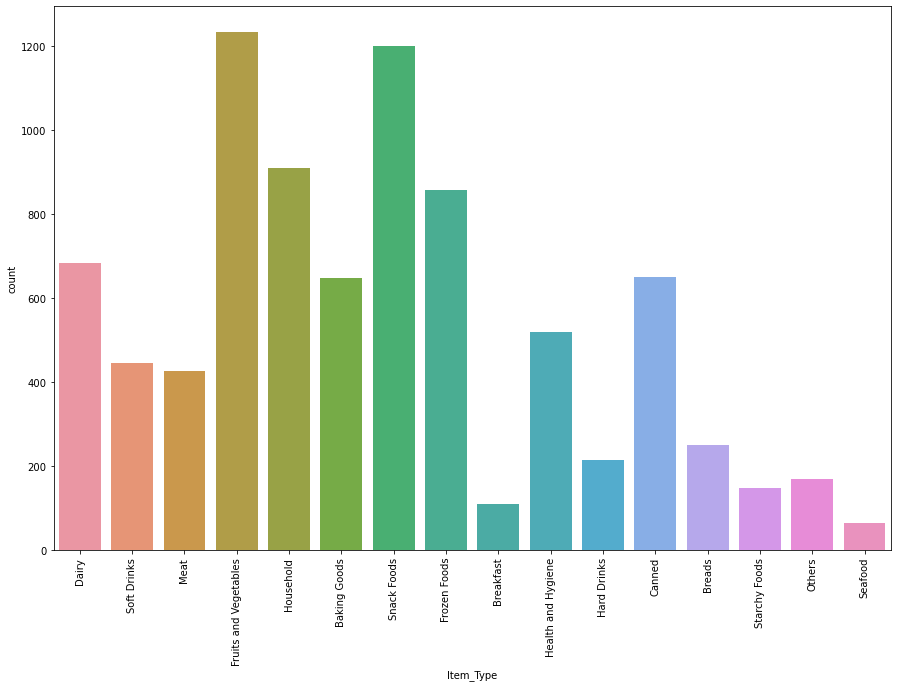

In [20]:
plt.figure(figsize=(15,10))
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)

We can see from the above observation that, fruits and vegetables are the most sold items followed by the snack foods.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low Fat'),
  Text(1, 0, 'Regular'),
  Text(2, 0, 'low fat'),
  Text(3, 0, 'LF'),
  Text(4, 0, 'reg')])

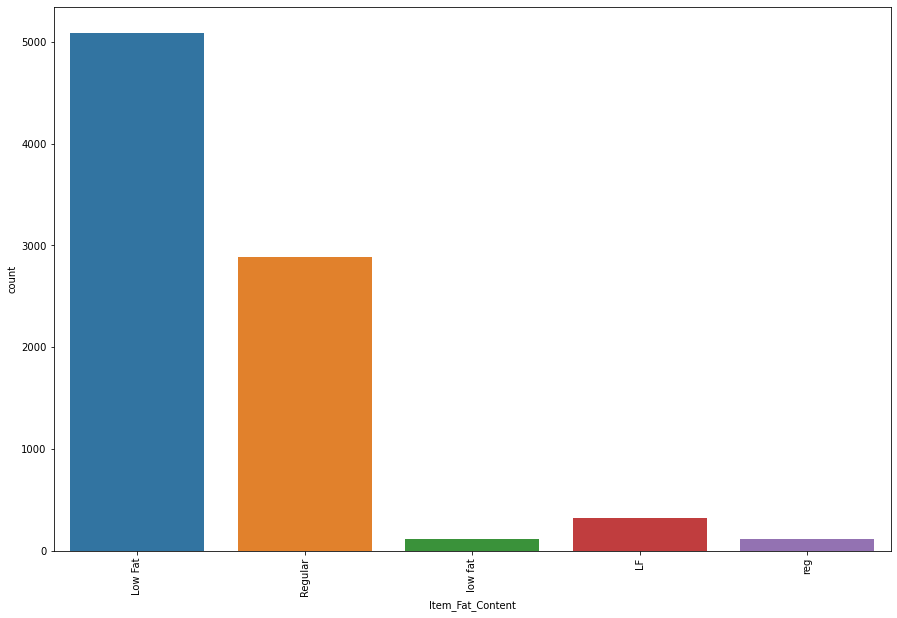

In [21]:
plt.figure(figsize=(15,10))
sns.countplot(train.Item_Fat_Content)
plt.xticks(rotation=90)

(array([0, 1, 2]),
 [Text(0, 0, 'Medium'), Text(1, 0, 'High'), Text(2, 0, 'Small')])

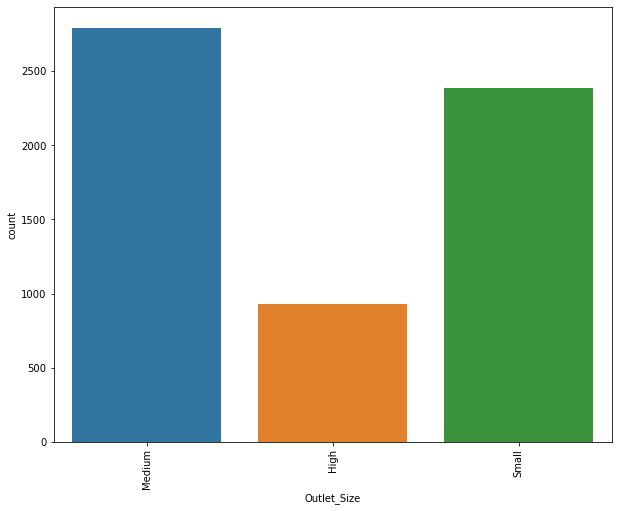

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Size)
plt.xticks(rotation=90)

We can see that the most of the outlets are in medium size.

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

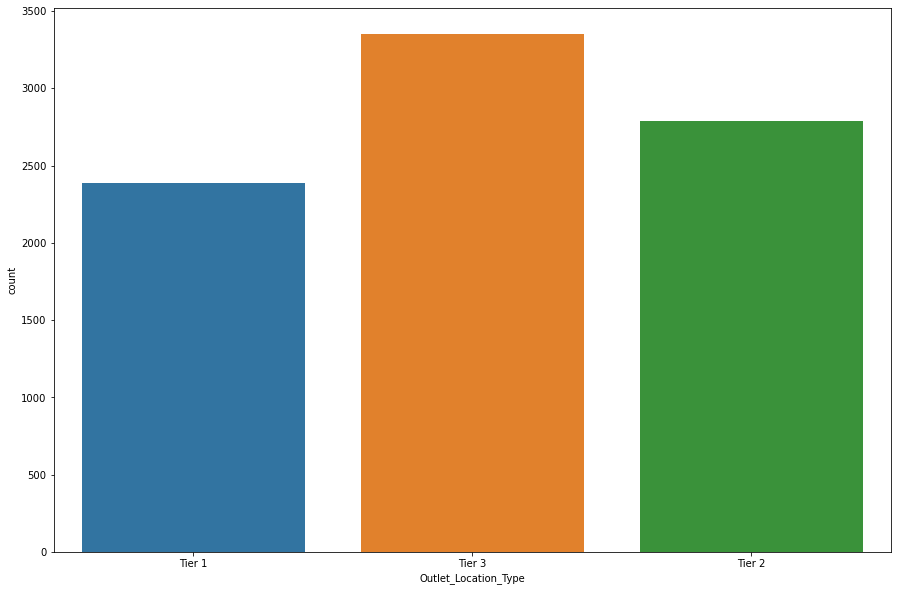

In [23]:
plt.figure(figsize=(15,10))
sns.countplot(train.Outlet_Location_Type)

We can see from the above observation that most of the outlets are located in Tier3 cities.

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

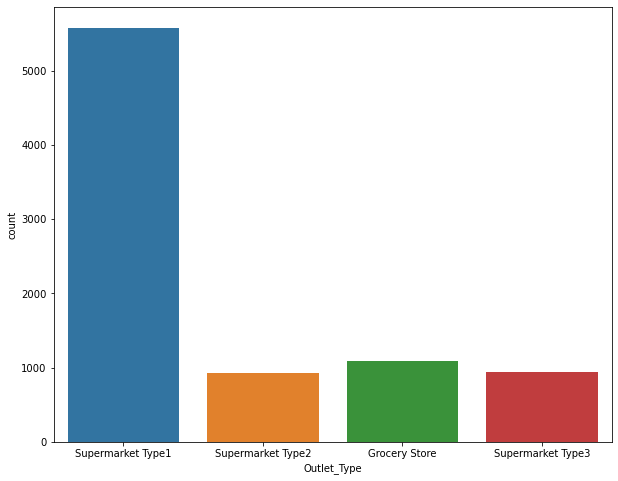

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(train.Outlet_Type)

From the above observation we can see that, most of the outlets are supermarket type1.

Scatter Plot:

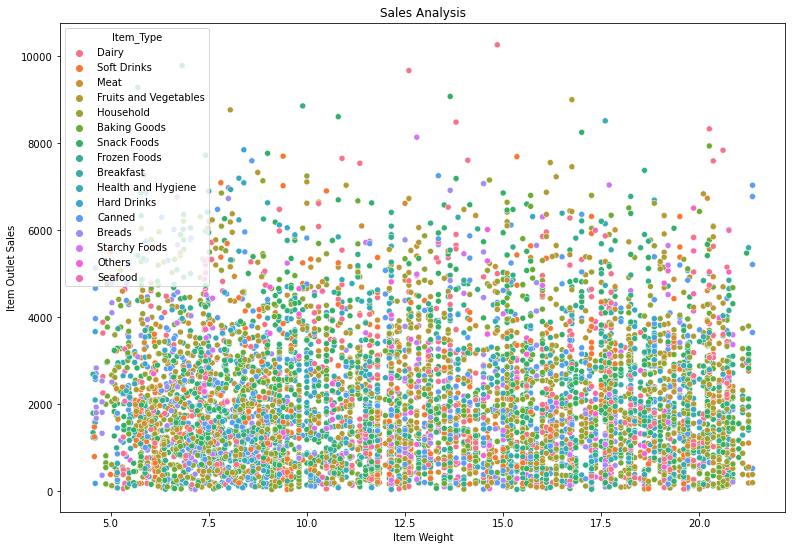

In [25]:
plt.figure(figsize=(13,9))
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',data=train)
plt.xlabel("Item Weight")
plt.ylabel("Item Outlet Sales")
plt.title("Sales Analysis")
plt.show()

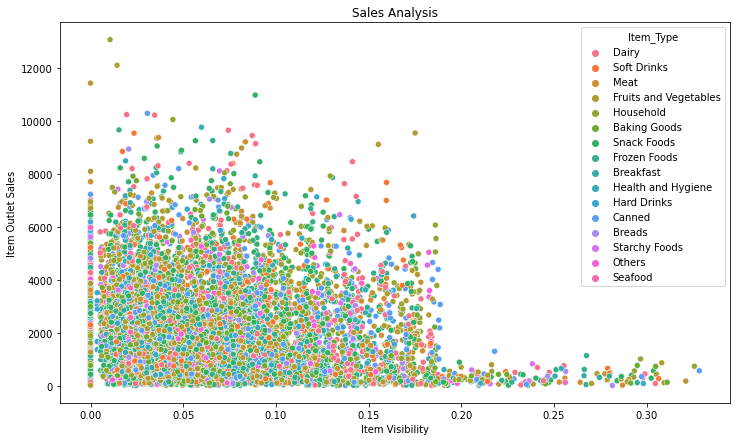

In [26]:
plt.figure(figsize=(12,7))
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',data=train)
plt.xlabel("Item Visibility")
plt.ylabel("Item Outlet Sales")
plt.title("Sales Analysis")
plt.show()

From the above observation we can see that, most of the products are less visible and still they have higher sales and the products which are more visible have less sales.

# Correlation:

In [27]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


Correlation using heatmap:

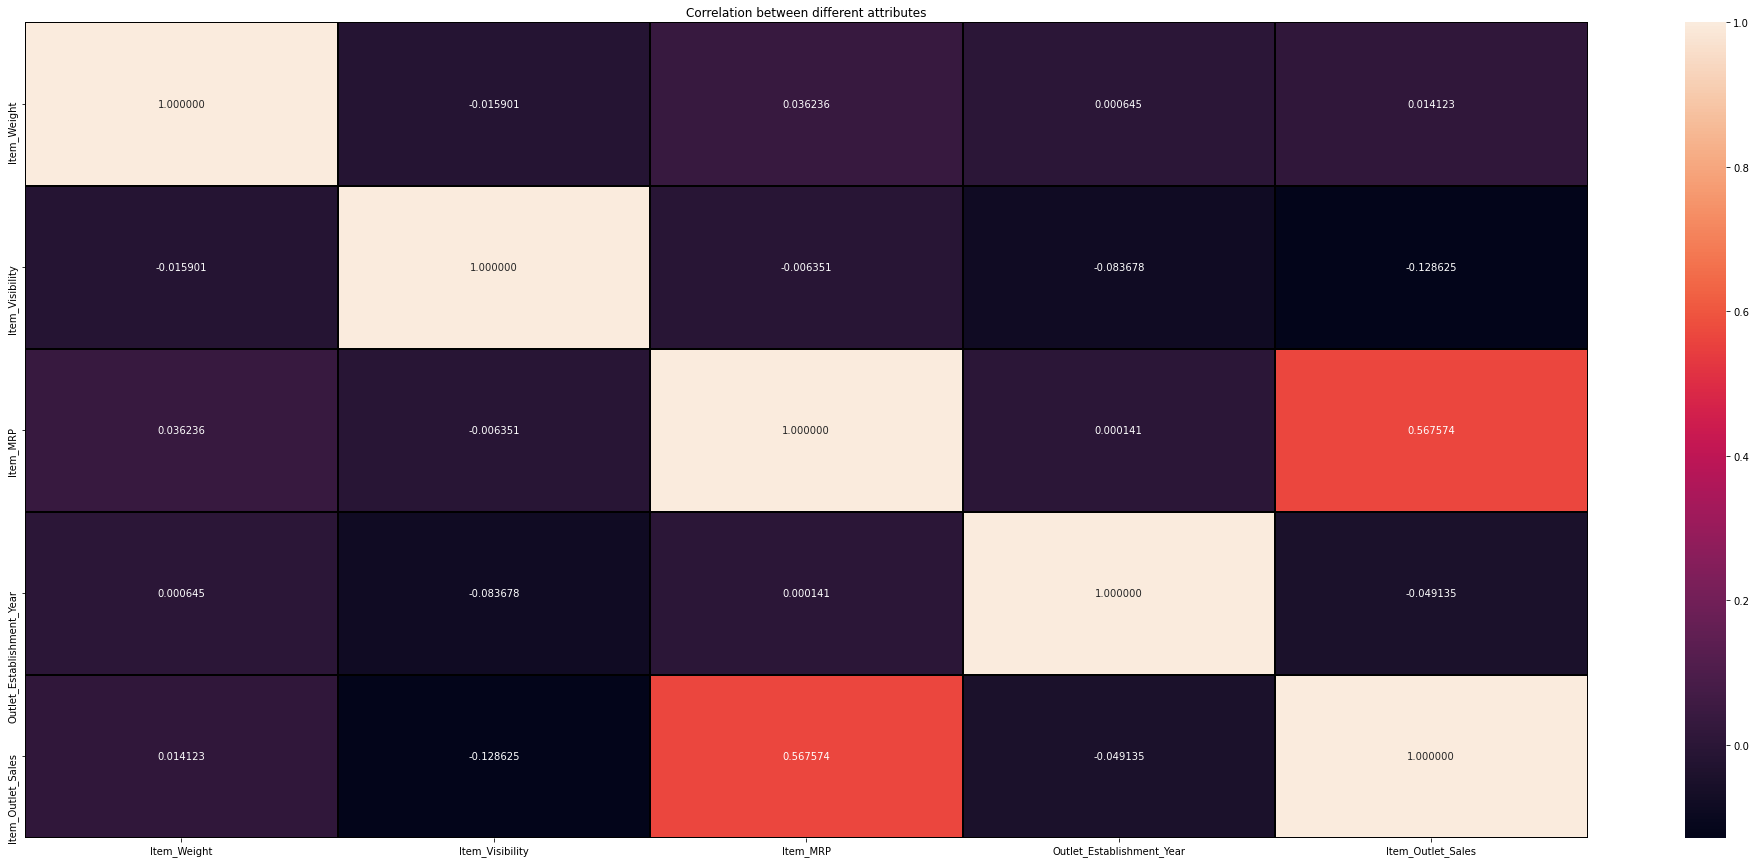

In [28]:
plt.figure(figsize=(35,15))
sns.heatmap(df.corr(),annot=True,linewidth=1,linecolor='black',fmt='f')
plt.title("Correlation between different attributes")
plt.show()

Outcome of Correlation:

# Describing Dataset:

In [29]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


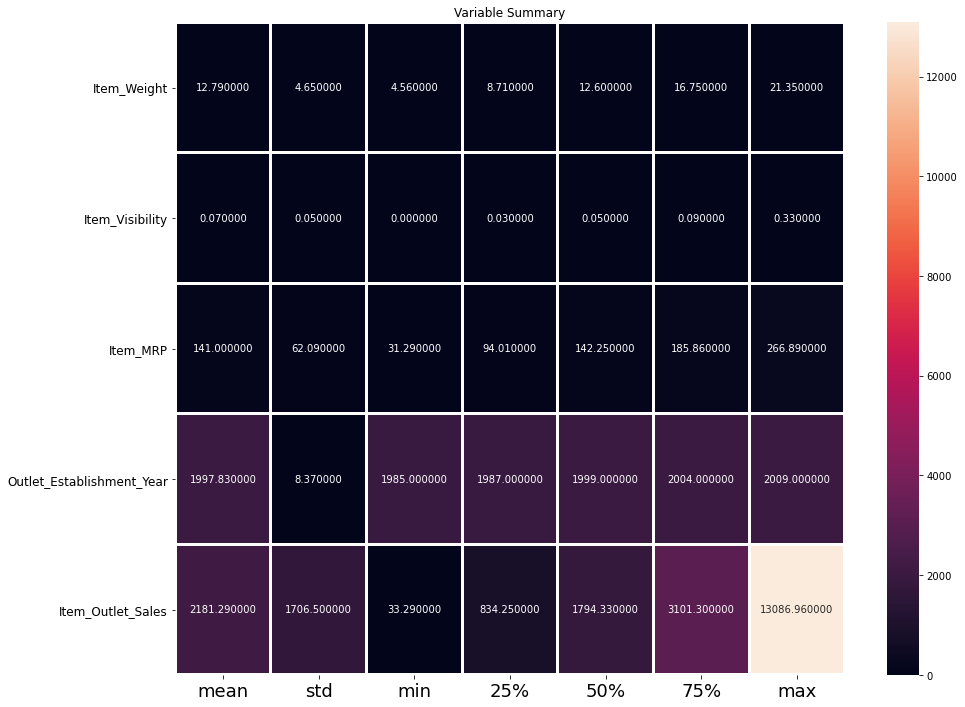

In [30]:
plt.figure(figsize=(15,12))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable Summary")
plt.show()

Outcome of Describe of datasets:

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

# Filling null values:

In [32]:
#we will replace NaN values with mean
df["Item_Weight"].mean()

12.792854228644991

In [33]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(),inplace=True)

In [34]:
#we will replace NaN values with mode
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [35]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [36]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [37]:
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [38]:
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [39]:
df['New_Item_type']=df['Item_Identifier'].apply(lambda x:x[0:2])

In [40]:
df['New_Item_type']=df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [41]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,Food
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,Food
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,Food
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,Non-Consumable
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,Food


# Label Encoding:

In [42]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['New_Item_type']=le.fit_transform(df['New_Item_type'])

df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_type
0,FDA15,9.30,0,0.016047,Dairy,249.8092,9,1999,1,0,1,3735.1380,train,1
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,3,2009,1,2,2,443.4228,train,0
2,FDN15,17.50,0,0.016760,Meat,141.6180,9,1999,1,0,1,2097.2700,train,1
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,0,1998,1,2,0,732.3800,train,1
4,NCD19,8.93,0,0.000000,Household,53.8614,1,1987,0,2,1,994.7052,train,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.013496,Snack Foods,141.3154,8,1997,2,0,1,NaN,test,1
14200,FDD47,7.60,1,0.142991,Starchy Foods,169.1448,3,2009,1,2,2,NaN,test,1
14201,NCO17,10.00,0,0.073529,Health and Hygiene,118.7440,7,2002,1,1,1,NaN,test,2
14202,FDJ26,15.30,1,0.000000,Canned,214.6218,2,2007,1,1,1,NaN,test,1


Outliers Checking:

<AxesSubplot:xlabel='Item_Weight'>

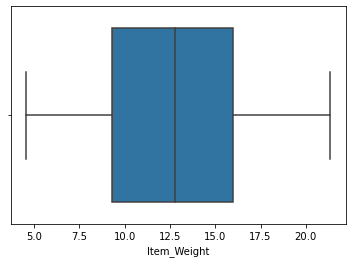

In [43]:
sns.boxplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Fat_Content'>

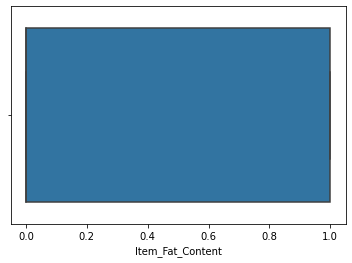

In [44]:
sns.boxplot(df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Visibility'>

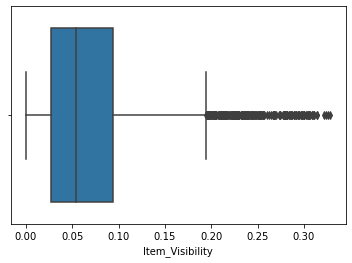

In [45]:
sns.boxplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP'>

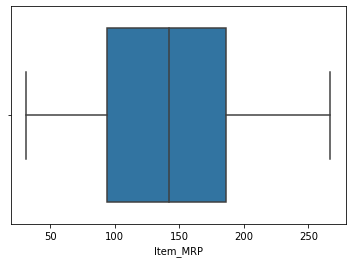

In [46]:
sns.boxplot(df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Identifier'>

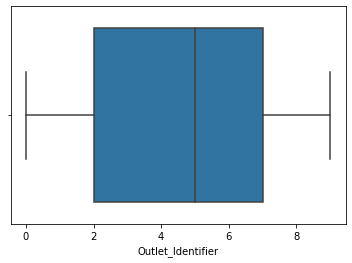

In [47]:
sns.boxplot(df['Outlet_Identifier'])

<AxesSubplot:xlabel='Outlet_Establishment_Year'>

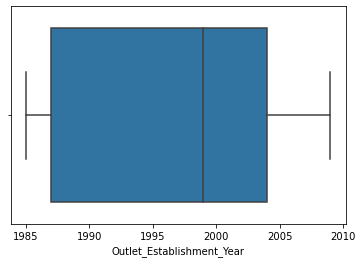

In [48]:
sns.boxplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size'>

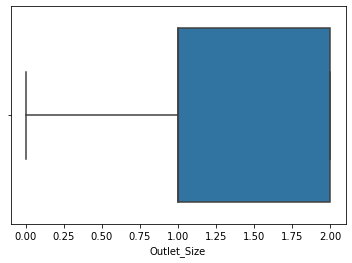

In [49]:
sns.boxplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Size'>

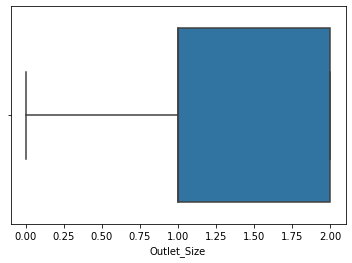

In [50]:
sns.boxplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type'>

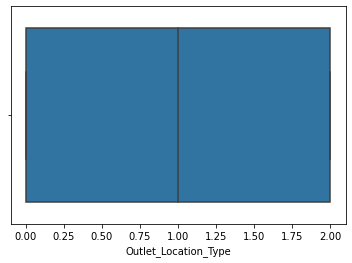

In [51]:
sns.boxplot(df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type'>

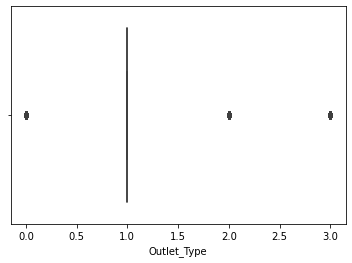

In [52]:
sns.boxplot(df['Outlet_Type'])

<AxesSubplot:xlabel='Item_Outlet_Sales'>

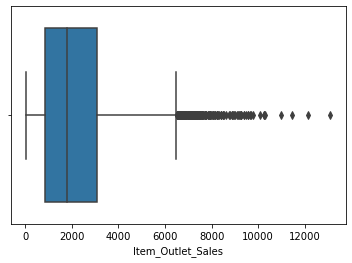

In [53]:
sns.boxplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='New_Item_type'>

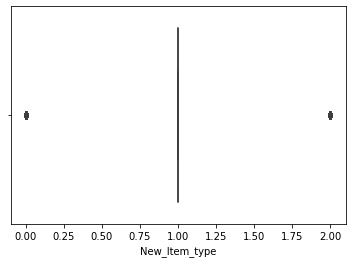

In [54]:
sns.boxplot(df['New_Item_type'])

We can see that columns[Item_Visibility,Outlet_Type,Item_Outlet_Sales,New_Item_type] has outliers and other columns has no outliers.

# Skewness:

In [55]:
df.skew()

Item_Weight                  0.111314
Item_Fat_Content             0.613645
Item_Visibility              1.195175
Item_MRP                     0.130728
Outlet_Identifier           -0.059994
Outlet_Establishment_Year   -0.396465
Outlet_Size                 -0.087077
Outlet_Location_Type        -0.209053
Outlet_Type                  0.927344
Item_Outlet_Sales            1.177531
New_Item_type                0.117284
dtype: float64

Outcome of skewness:

# Data Cleaning:

In [56]:
df=df.drop(["Item_Identifier","Item_Type","Outlet_Establishment_Year"],axis=1)

In [57]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,New_Item_type
0,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380,train,1
1,5.92,1,0.019278,48.2692,3,1,2,2,443.4228,train,0
2,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700,train,1
3,19.20,1,0.000000,182.0950,0,1,2,0,732.3800,train,1
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,train,2
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,141.3154,8,2,0,1,NaN,test,1
14200,7.60,1,0.142991,169.1448,3,1,2,2,NaN,test,1
14201,10.00,0,0.073529,118.7440,7,1,1,1,NaN,test,2
14202,15.30,1,0.000000,214.6218,2,1,1,1,NaN,test,1


In [58]:
train=df.loc[df['source']=='train']
test=df.loc[df['source']=='test']

In [59]:
train=train.drop(["source"],axis=1)

In [60]:
train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type
0,9.300,0,0.016047,249.8092,9,1,0,1,3735.1380,1
1,5.920,1,0.019278,48.2692,3,1,2,2,443.4228,0
2,17.500,0,0.016760,141.6180,9,1,0,1,2097.2700,1
3,19.200,1,0.000000,182.0950,0,1,2,0,732.3800,1
4,8.930,0,0.000000,53.8614,1,0,2,1,994.7052,2
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,214.5218,1,0,2,1,2778.3834,1
8519,8.380,1,0.046982,108.1570,7,1,1,1,549.2850,1
8520,10.600,0,0.035186,85.1224,6,2,1,1,1193.1136,2
8521,7.210,1,0.145221,103.1332,3,1,2,2,1845.5976,1


In [61]:
test=test.drop(["source","Item_Outlet_Sales"],axis=1)

In [62]:
test

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,New_Item_type
8523,20.750000,0,0.007565,107.8622,9,1,0,1,1
8524,8.300000,1,0.038428,87.3198,2,1,1,1,1
8525,14.600000,0,0.099575,241.7538,0,1,2,0,2
8526,7.315000,0,0.015388,155.0340,2,1,1,1,1
8527,12.792854,1,0.118599,234.2300,5,1,2,3,1
...,...,...,...,...,...,...,...,...,...
14199,10.500000,1,0.013496,141.3154,8,2,0,1,1
14200,7.600000,1,0.142991,169.1448,3,1,2,2,1
14201,10.000000,0,0.073529,118.7440,7,1,1,1,2
14202,15.300000,1,0.000000,214.6218,2,1,1,1,1


In [63]:
df=df.drop(["source"],axis=1)

In [64]:
df

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_type
0,9.30,0,0.016047,249.8092,9,1,0,1,3735.1380,1
1,5.92,1,0.019278,48.2692,3,1,2,2,443.4228,0
2,17.50,0,0.016760,141.6180,9,1,0,1,2097.2700,1
3,19.20,1,0.000000,182.0950,0,1,2,0,732.3800,1
4,8.93,0,0.000000,53.8614,1,0,2,1,994.7052,2
...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,141.3154,8,2,0,1,NaN,1
14200,7.60,1,0.142991,169.1448,3,1,2,2,NaN,1
14201,10.00,0,0.073529,118.7440,7,1,1,1,NaN,2
14202,15.30,1,0.000000,214.6218,2,1,1,1,NaN,1


# Removing Outliers:

Z-Score Technique:

In [65]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(14204, 10)

In [66]:
threshold=3
print(np.where(z>3))

(array([   49,    83,   108,   174,   434,   502,   521,   532,   854,
        1159,  1272,  1291,  1311,  1324,  1434,  1496,  1501,  1560,
        1575,  1644,  1651,  1805,  1827,  1841,  2088,  2122,  2251,
        2324,  2439,  2445,  2586,  2613,  2728,  2855,  2895,  3017,
        3206,  3399,  3458,  3474,  3488,  3497,  3540,  3750,  3767,
        3884,  3993,  4006,  4219,  4382,  4408,  4530,  4656,  4674,
        4789,  4941,  5031,  5150,  5287,  5374,  5732,  5734,  5795,
        5837,  5880,  5891,  5946,  6008,  6012,  6179,  6536,  6576,
        6622,  6674,  6786,  6903,  7005,  7088,  7107,  7121,  7215,
        7250,  7278,  7388,  7499,  7558,  7603,  7744,  7866,  7949,
        8194,  8215,  8273,  8345,  8432,  8569,  8599,  8601,  8612,
        8661,  8856,  8908,  8997,  9066,  9160,  9381,  9394,  9569,
        9714,  9779,  9793,  9934, 10039, 10139, 10233, 10335, 10346,
       10380, 10438, 10442, 10542, 10702, 10753, 10888, 10903, 10916,
       11027, 11039

In [67]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(14204, 10)
(0, 10)


# Dividing Data in features and vector:

In [68]:
x_train=train
y_train=train['Item_Outlet_Sales']
x_test=test

# Transform data to remove skewness

In [69]:
from sklearn.preprocessing import power_transform
x_train=power_transform(x_train,method='yeo-johnson')

In [70]:
x_train

array([[-0.81923038, -0.73814723, -1.14688621, ..., -0.12348771,
         0.98507755, -0.17167574],
       [-1.7350396 ,  1.35474328, -1.03709991, ...,  1.04059102,
        -1.21813513, -2.12615212],
       [ 1.08849443, -0.73814723, -1.12237453, ..., -0.12348771,
         0.22036037, -0.17167574],
       ...,
       [-0.49242389, -0.73814723, -0.54297932, ..., -0.12348771,
        -0.39304411,  1.7200184 ],
       [-1.37234297,  1.35474328,  1.45998957, ...,  1.04059102,
         0.0706692 , -0.17167574],
       [ 0.49564188, -0.73814723, -0.27619496, ..., -0.12348771,
        -0.79793408, -2.12615212]])

# Standard Scaler:

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_train

array([[-0.81923038, -0.73814723, -1.14688621, ..., -0.12348771,
         0.98507755, -0.17167574],
       [-1.7350396 ,  1.35474328, -1.03709991, ...,  1.04059102,
        -1.21813513, -2.12615212],
       [ 1.08849443, -0.73814723, -1.12237453, ..., -0.12348771,
         0.22036037, -0.17167574],
       ...,
       [-0.49242389, -0.73814723, -0.54297932, ..., -0.12348771,
        -0.39304411,  1.7200184 ],
       [-1.37234297,  1.35474328,  1.45998957, ...,  1.04059102,
         0.0706692 , -0.17167574],
       [ 0.49564188, -0.73814723, -0.27619496, ..., -0.12348771,
        -0.79793408, -2.12615212]])

# MODEL BUILDING:

# Linear Regression:

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.20,random_state=45)

In [74]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [75]:
lr_pred=lr.predict(xtest)
lr_pred

array([3608.07640383, 2045.61305144,  972.08051283, ..., 1539.91522107,
       2995.01034917, 4084.84098151])

In [76]:
print('r2_score:',r2_score(ytest,lr_pred)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,lr_pred))
print('Mean Squared Error:',mean_squared_error(ytest,lr_pred))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,lr_pred)))

r2_score: 91.37896776617305
Mean Absolute Error: 382.8452377172341
Mean Squared Error: 260031.8366044508
Root Mean Square Error: 509.9331687627809


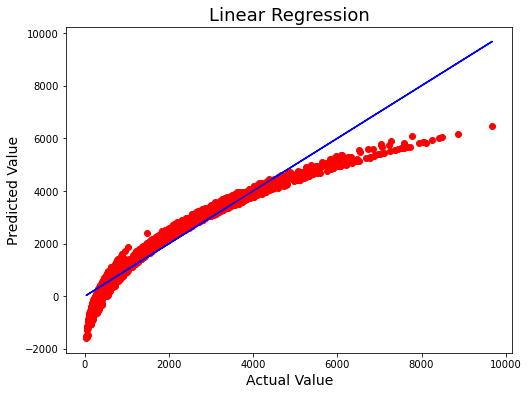

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=lr_pred, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

# Regularization:

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# 1.Lasso:

In [79]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, .1, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [80]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(xtrain,ytrain)
ls.score(xtrain,ytrain)
pred_ls = ls.predict(xtest)

lss = r2_score(ytest,pred_ls)
for j in range(2,10):
    lsscore = cross_val_score(ls,x_train,y_train,cv=j)
    lsc = lsscore.mean() 
    print("At cv:-",j)
    print("Cross validation score is:-",lsc*100 )
    print("R2_score is :-",lss*100)
    print("\n")

At cv:- 2
Cross validation score is:- 90.71501509827466
R2_score is :- 91.37535580705593


At cv:- 3
Cross validation score is:- 90.70914005405481
R2_score is :- 91.37535580705593


At cv:- 4
Cross validation score is:- 90.71643622302487
R2_score is :- 91.37535580705593


At cv:- 5
Cross validation score is:- 90.70864908148589
R2_score is :- 91.37535580705593


At cv:- 6
Cross validation score is:- 90.71727020994021
R2_score is :- 91.37535580705593


At cv:- 7
Cross validation score is:- 90.7132843233452
R2_score is :- 91.37535580705593


At cv:- 8
Cross validation score is:- 90.72519047433904
R2_score is :- 91.37535580705593


At cv:- 9
Cross validation score is:- 90.708420043623
R2_score is :- 91.37535580705593




In [81]:
print("At cv:",8)
print("Cross validation score is:",90.72519047433904)
print("R2_Score is:",90.73648311726764)

At cv: 8
Cross validation score is: 90.72519047433904
R2_Score is: 90.73648311726764


In [82]:
print('r2_score:',r2_score(ytest,pred_ls)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ls))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ls))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ls)))

r2_score: 91.37535580705593
Mean Absolute Error: 382.9591974530219
Mean Squared Error: 260140.78230114814
Root Mean Square Error: 510.0399810810405


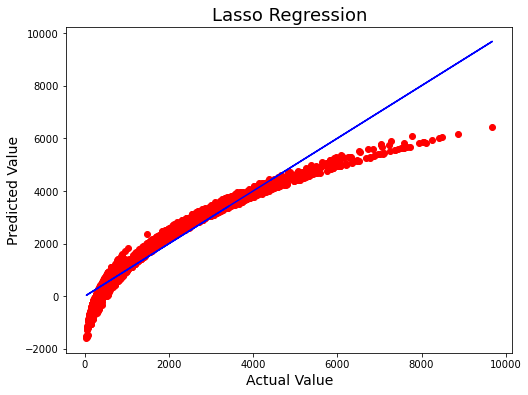

In [83]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ls, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Lasso Regression',fontsize=18)
plt.show()

# 2.Ridge:

In [84]:
from sklearn.linear_model import Ridge

parameters = {'alpha':[.0001, .001, .01, .1, 1],'fit_intercept':[True,False],'normalize':[True,False],'copy_X':[True,False],'tol':[0.001,0.01,0.1],'random_state':[0,1,2,3,4,5,6,7,8,9]}
rd = Ridge()
clf = GridSearchCV(rd,parameters)
clf.fit(xtrain,ytrain)

print(clf.best_params_)

{'alpha': 0.001, 'copy_X': True, 'fit_intercept': True, 'normalize': True, 'random_state': 0, 'tol': 0.001}


In [85]:
rd = Ridge(alpha=1, copy_X= True, fit_intercept= True, normalize=False, random_state= 0, tol= 0.001)
rd.fit(xtrain,ytrain)
rd.score(xtrain,ytrain)
pred_rd = rd.predict(xtest)

rds = r2_score(ytest,pred_rd)
print('R2 Score:',rds*100)

rdscore = cross_val_score(rd,xtrain,ytrain,cv=8)
rdc = rdscore.mean() 
print('Cross Val Score:',rdc*100)

R2 Score: 91.37900595920546
Cross Val Score: 90.52321023943517


In [86]:
print('r2_score:',r2_score(ytest,pred_rd)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rd)))

r2_score: 91.37900595920546
Mean Absolute Error: 382.82628662088416
Mean Squared Error: 260030.6846073238
Root Mean Square Error: 509.93203920456284


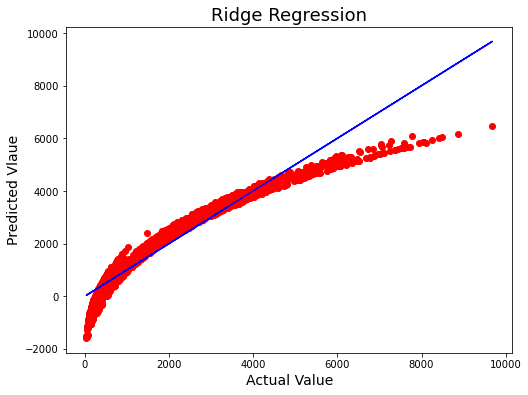

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Ridge Regression',fontsize=18)
plt.show()

# Approaching more Regressors:

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor

# 1.Decision Tree Regressor:

In [89]:
dtr=DecisionTreeRegressor(criterion='mse',splitter='best')
dtr.fit(xtrain,ytrain)
dtr.score(xtrain,ytrain)
pred_dtr = dtr.predict(xtest)

dtr_r2 = r2_score(ytest,pred_dtr)
print('R2 Score:',dtr_r2*100)

dtrscore = cross_val_score(dtr,x_train,y_train,cv=8)
dtrcc = dtrscore.mean() 
print('Cross Val Score:',dtrcc*100)

R2 Score: 99.99868226047379
Cross Val Score: 99.96024494375119


In [90]:
print('r2_score:',r2_score(ytest,pred_dtr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_dtr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_dtr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_dtr)))

r2_score: 99.99868226047379
Mean Absolute Error: 1.4799894428152598
Mean Squared Error: 39.746311099918046
Root Mean Square Error: 6.30446755086566


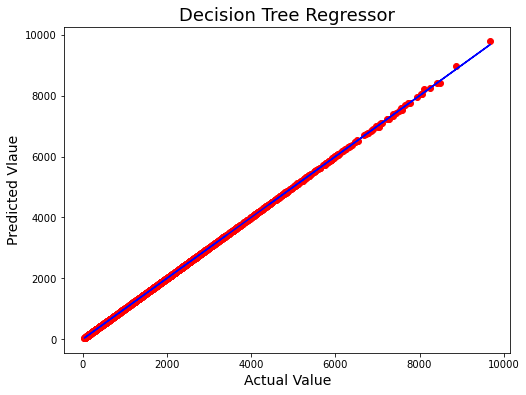

In [91]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_dtr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('Decision Tree Regressor',fontsize=18)
plt.show()

All the points lie on the best fit line.

# 2.KNeighbors Regressor

In [92]:
knr=KNeighborsRegressor(n_neighbors=5,algorithm='auto')
knr.fit(xtrain,ytrain)
knr.score(xtrain,ytrain)
pred_knr = knr.predict(xtest)

knr_r2 = r2_score(ytest,pred_knr)
print('R2 Score:',knr_r2*100)

knrscore = cross_val_score(knr,x_train,y_train,cv=8)
knrcc = knrscore.mean() 
print('Cross Val Score:',knrcc*100)

R2 Score: 92.38456236936513
Cross Val Score: 91.80777539870442


In [93]:
print('r2_score:',r2_score(ytest,pred_knr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_knr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_knr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_knr)))

r2_score: 92.38456236936513
Mean Absolute Error: 325.0374682228738
Mean Squared Error: 229700.59500190266
Root Mean Square Error: 479.27089938979464


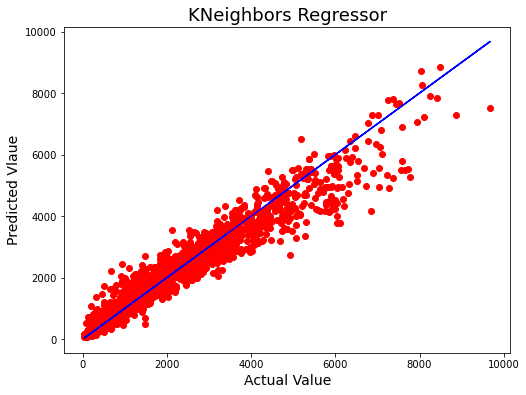

In [94]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_knr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('KNeighbors Regressor',fontsize=18)
plt.show()

# 3.SVR:

In [95]:
svr=SVR()
svr.fit(xtrain,ytrain)
svr.score(xtrain,ytrain)
pred_svr = svr.predict(xtest)

svr_r2 = r2_score(ytest,pred_svr)
print('R2 Score:',svr_r2*100)

svr_score = cross_val_score(svr,x_train,y_train,cv=8)
svr_cc = svr_score.mean() 
print('Cross Val Score:',svr_cc*100)

R2 Score: 17.69433937460362
Cross Val Score: 20.925123245679767


In [96]:
print('r2_score:',r2_score(ytest,pred_svr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_svr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_svr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_svr)))

r2_score: 17.69433937460362
Mean Absolute Error: 1138.681758381855
Mean Squared Error: 2482544.028937457
Root Mean Square Error: 1575.6090977578979


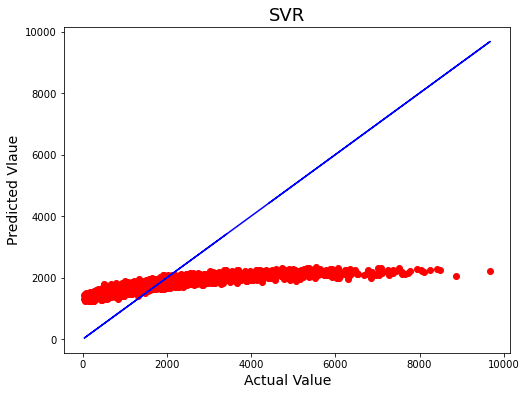

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_svr, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SVR',fontsize=18)
plt.show()

# 4:SGD Regressor:

In [98]:
sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
sgd.score(xtrain,ytrain)
pred_sgd = sgd.predict(xtest)

sgd_r2 = r2_score(ytest,pred_sgd)
print('R2 Score:',sgd_r2*100)

sgd_score = cross_val_score(sgd,x_train,y_train,cv=8)
sgd_cc = sgd_score.mean() 
print('Cross Val Score:',sgd_cc*100)

R2 Score: 91.31308437553083
Cross Val Score: 90.68502373833478


In [99]:
print('r2_score:',r2_score(ytest,pred_sgd)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_sgd))
print('Mean Squared Error:',mean_squared_error(ytest,pred_sgd))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_sgd)))

r2_score: 91.31308437553083
Mean Absolute Error: 387.6094520540905
Mean Squared Error: 262019.044006739
Root Mean Square Error: 511.8779581176933


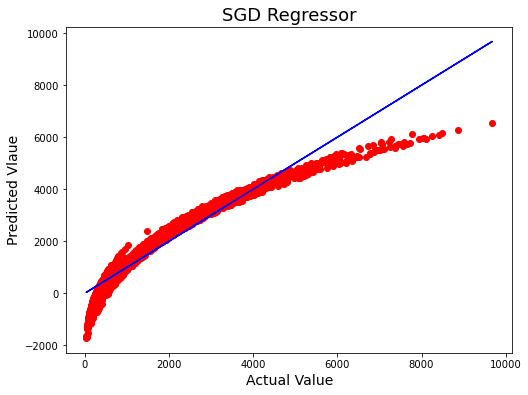

In [100]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_sgd, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Vlaue',fontsize=14)
plt.title('SGD Regressor',fontsize=18)
plt.show()

# Ensemble Methods:

# 1.Random Forest Regressor:

In [101]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,criterion='mse')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
pred_rf = rf.predict(xtest)

rf_r2 = r2_score(ytest,pred_rf)
print('R2 Score:',rf_r2*100)

rf_score = cross_val_score(rf,x_train,y_train,cv=8)
rf_cc = rf_score.mean() 
print('Cross Val Score:',rf_cc*100)

R2 Score: 99.99939123262554
Cross Val Score: 99.98423020049468


In [102]:
print('r2_score:',r2_score(ytest,pred_rf)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_rf))
print('Mean Squared Error:',mean_squared_error(ytest,pred_rf))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_rf)))

r2_score: 99.99939123262554
Mean Absolute Error: 0.9550032140763143
Mean Squared Error: 18.361942532101615
Root Mean Square Error: 4.285083725214902


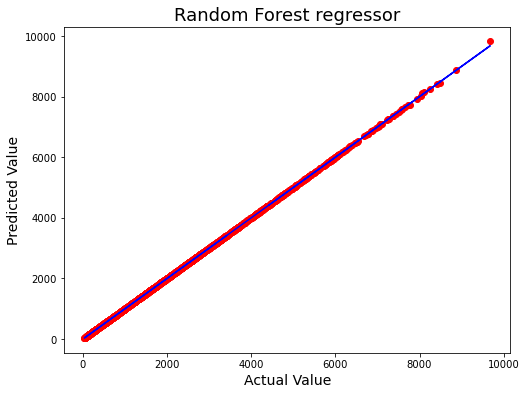

In [103]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_rf, color='r')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Random Forest regressor',fontsize=18)
plt.show()

All the data points lie on the best fit line.

# 2.ADA Boost Regressor:

In [104]:
from sklearn.ensemble import AdaBoostRegressor

ada=AdaBoostRegressor(n_estimators=50)
ada.fit(xtrain,ytrain)
ada.score(xtrain,ytrain)
pred_ada = ada.predict(xtest)

ada_r2 = r2_score(ytest,pred_ada)
print('R2 Score:',ada_r2*100)

ada_score = cross_val_score(ada,x_train,y_train,cv=8)
ada_cc = ada_score.mean() 
print('Cross Val Score:',ada_cc*100)

R2 Score: 99.26993306531095
Cross Val Score: 99.24578234345131


In [105]:
print('r2_score:',r2_score(ytest,pred_ada)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_ada))
print('Mean Squared Error:',mean_squared_error(ytest,pred_ada))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_ada)))

r2_score: 99.26993306531095
Mean Absolute Error: 121.60688361062408
Mean Squared Error: 22020.63984014411
Root Mean Square Error: 148.39353031767965


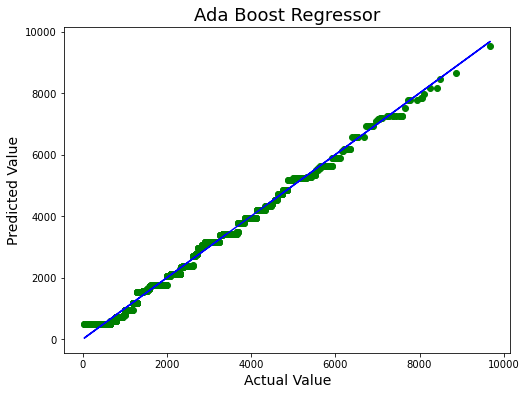

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_ada, color='g')
plt.plot(ytest,ytest, color='b')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Ada Boost Regressor',fontsize=18)
plt.show()

Most of the data points lie on the best fit line.

# 3.Gradient Boosting Regressor:

In [107]:
from sklearn.ensemble import GradientBoostingRegressor
gbr= GradientBoostingRegressor(criterion='friedman_mse',loss='huber',n_estimators=200)
gbr.fit(xtrain, ytrain)
gbr.score(xtrain, ytrain)
pred_gbr =gbr.predict(xtest)

gbrs= r2_score(ytest,pred_gbr)
print('R2 Score:',gbrs*100)

gbscore = cross_val_score(gbr,x_train,y_train,cv=8)
gbrc= gbscore.mean() 
print('Cross Val Score:',gbrc*100)

R2 Score: 99.99315418326677
Cross Val Score: 99.984006521989


In [108]:
print('r2_score:',r2_score(ytest,pred_gbr)*100)
print('Mean Absolute Error:',mean_absolute_error(ytest,pred_gbr))
print('Mean Squared Error:',mean_squared_error(ytest,pred_gbr))
print('Root Mean Square Error:',np.sqrt(mean_squared_error(ytest,pred_gbr)))

r2_score: 99.99315418326677
Mean Absolute Error: 9.818400050958788
Mean Squared Error: 206.48690898228926
Root Mean Square Error: 14.369652361219087


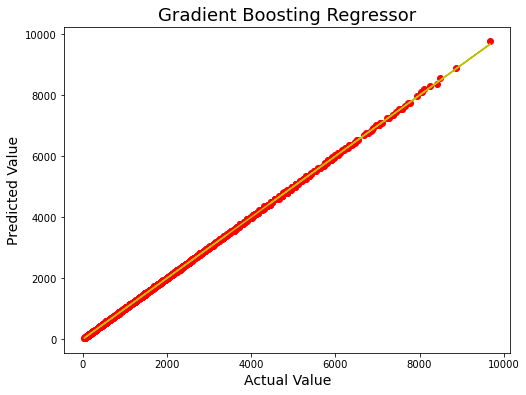

In [109]:
plt.figure(figsize=(8,6))
plt.scatter(x=ytest, y=pred_gbr, color='r')
plt.plot(ytest,ytest, color='y')
plt.xlabel('Actual Value',fontsize=14)
plt.ylabel('Predicted Value',fontsize=14)
plt.title('Gradient Boosting Regressor',fontsize=18)
plt.show()

Most of the data points lie on best fit line.

The best model is Decision Tree Regressor. Since the difference between the percentage score of cross validation and r2_score is optimum.

# Model Saving:

In [110]:
import pickle
filename = 'big_mart_sales.pkl'
pickle.dump(dtr, open(filename, 'wb'))

# Conclusion:

In [111]:
import numpy as np
a=np.array(ytest)
a

array([3410.2276, 1605.9096,  675.1212, ..., 1230.3984, 2684.5056,
       4431.5648])

In [112]:
predicted=np.array(dtr.predict(xtest))
predicted

array([3410.2276, 1605.9096,  675.1212, ..., 1230.3984, 2681.8424,
       4431.5648])

In [113]:
df_com=pd.DataFrame({"original":a,"predicted":predicted}, index= range(len(a)))
df_com

,original,predicted
0,3410.2276,3410.2276
1,1605.9096,1605.9096
2,675.1212,675.1212
3,1662.5026,1662.5026
4,4211.1850,4211.1850
...,...,...
1700,639.1680,639.1680
1701,175.1054,174.4396
1702,1230.3984,1230.3984
1703,2684.5056,2681.8424


# From the above table, the model is predicted with 99% percent accuracy.